# EDA

In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
from tqdm import tqdm_notebook
import lightgbm as lgb
from scipy.sparse import vstack, csr_matrix, save_npz, load_npz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")
gc.enable()
sns.set()

In [2]:
pd.set_option('max_rows', 200)
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)

## Data Load

In [401]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.shape, test.shape

((200000, 202), (200000, 201))

In [402]:
col_list = [col for col in train.columns if col not in ['ID_code', 'target']]

## Find Time Series

In [362]:
result = {}
for col in tqdm_notebook(col_list):
    windows = 100
    iterations = 200000 / windows
    target = train.sort_values(col).target.values
    result[col] = []
    for i in range(int(iterations)):
        result[col].append(target[i * windows: (i + 1) * windows].sum())

In [363]:
time_series = pd.DataFrame(result).T

## Let`s EDA !

## 오른쪽 위
* var0, var1, var2, var5, var6, var8, var11, var15, var16, var18, var22, var24, var26, var32, var35, var48, var49, var51, var52, var53
* var3, var4, var37, var40, var48, var55, var60, var61, var62, var65, var66, var67, var69, var70, var71, var78, var79, var82, var89, var90, var91, var94, var95, var97, var99, var104, var105, var106, var110, var111, var112, var118, var119, var125, var128, var130, var133, var134, 135, 137, var140, var144, var145, var147

## 왼쪽 위
* var9, var12, var13, var20, var21, var23, var28, var33, var34, var36, var43, var44, var50, var56
* var14, var31, var54, var57, var58, var59, var63, var68, var73, var75, var76, var77, var80, var81, var83, var85, var86, var87, var88, var92, var93, var102, var107, var109, var113, var114, var115, var116, , var121, var122, var123, var127, var131, var132, var138, var139, var141, var142, var143, var146, var148

## 주기성
* 136, 193
* var96, var98, var100, var117, var120, var124, var126, var129
* var7, var10, var17, var27, var29, var30, var38, var39, var41, var42
* var19, var25, var45, var46, var47, var64, var72, var74, var84, var101, var103

## 특이패턴
* var108

In [281]:
# idx = 0

In [333]:
col = col_list[idx]
plt.figure(figsize=(18, 8))
plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

IndexError: list index out of range

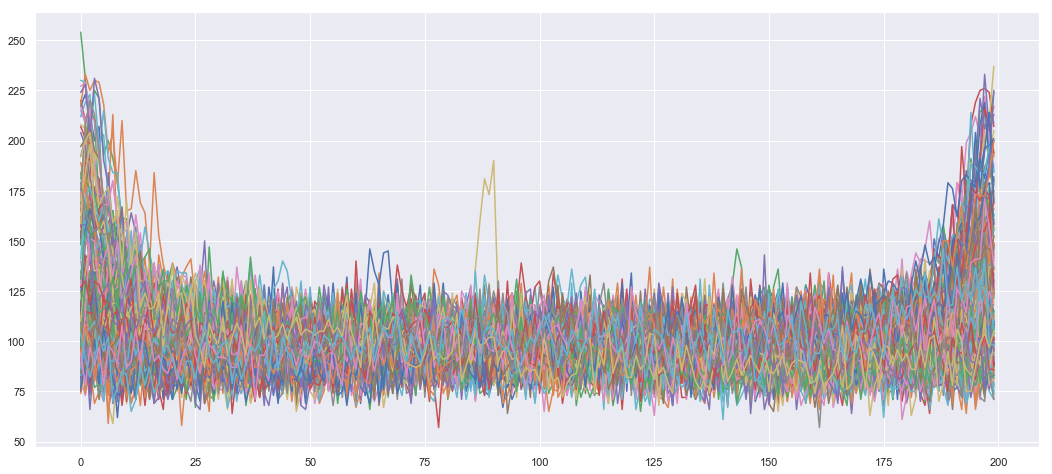

In [360]:
plt.figure(figsize=(18, 8))
for col in col_list:
    plt.plot(time_series.loc[col])

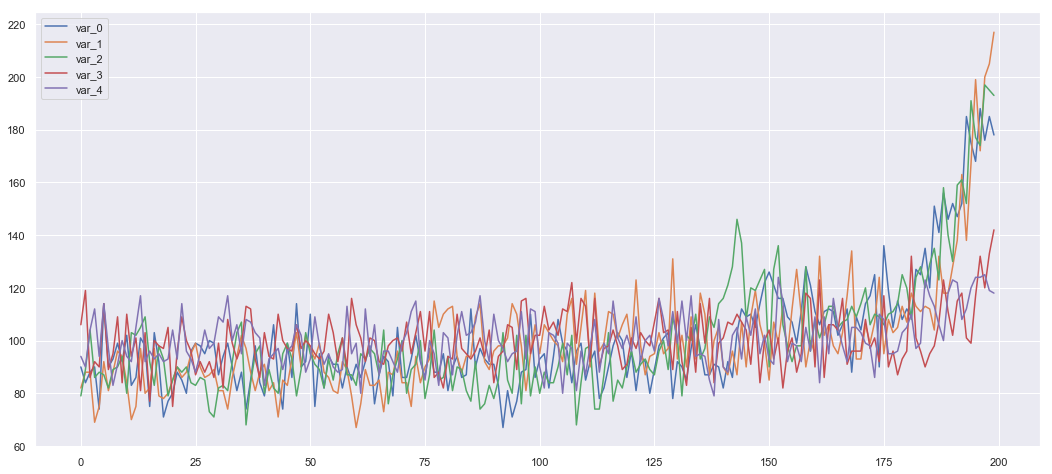

In [72]:
idx = 0
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

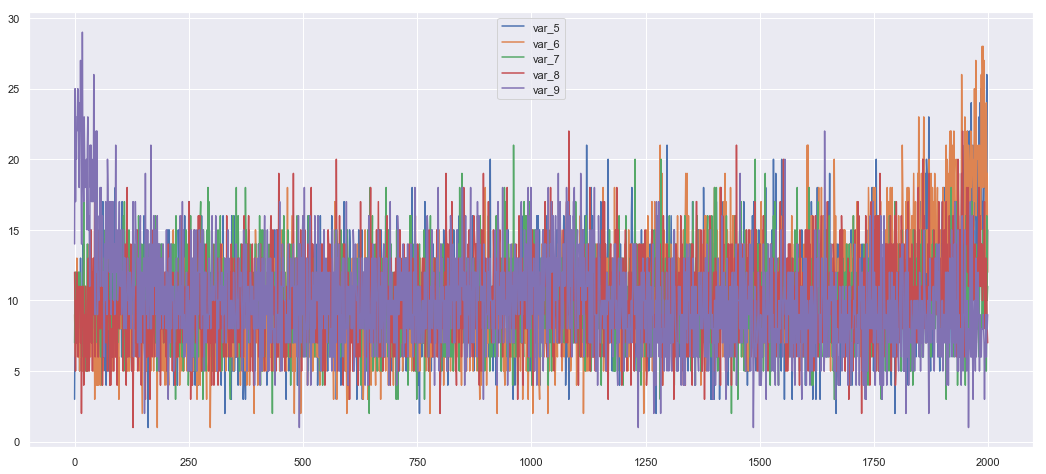

In [65]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

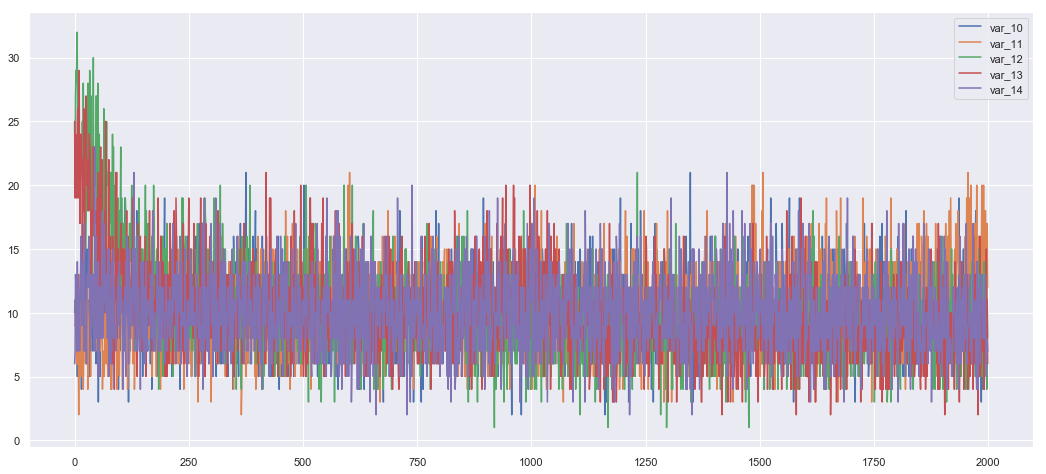

In [66]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

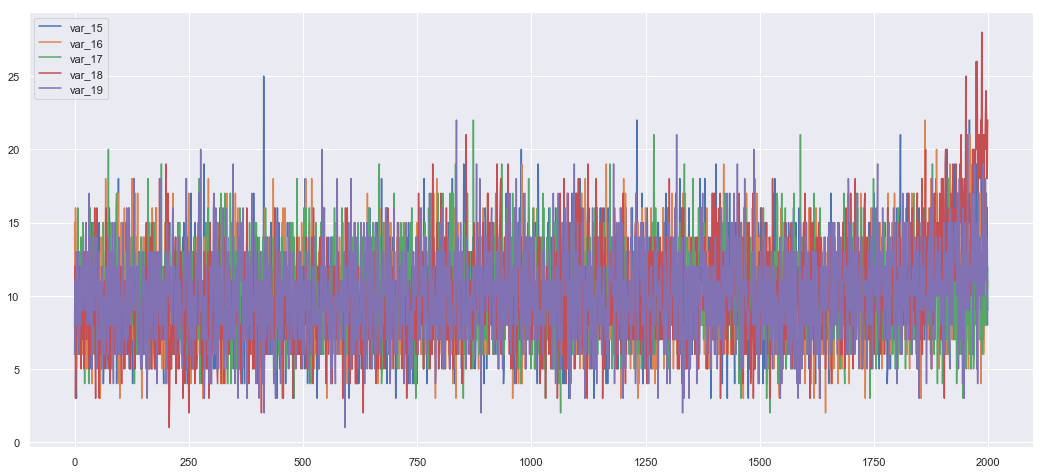

In [67]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

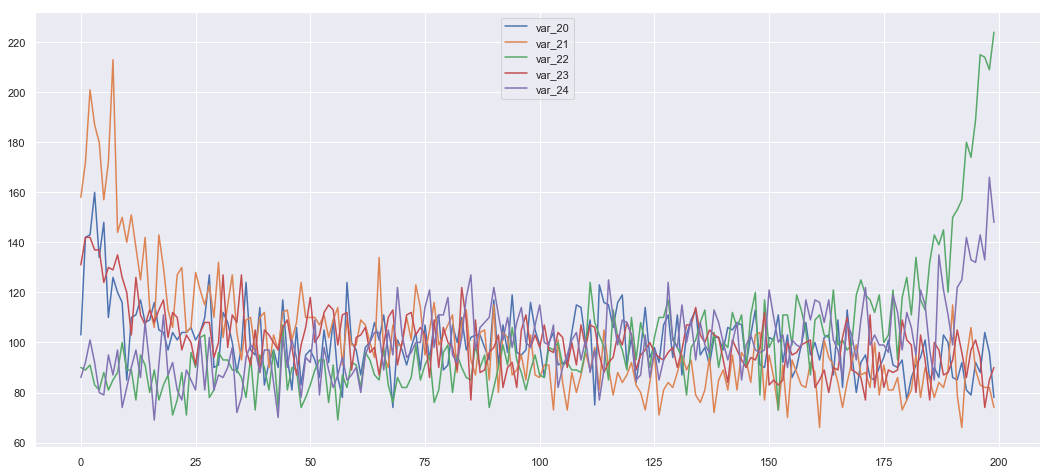

In [22]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

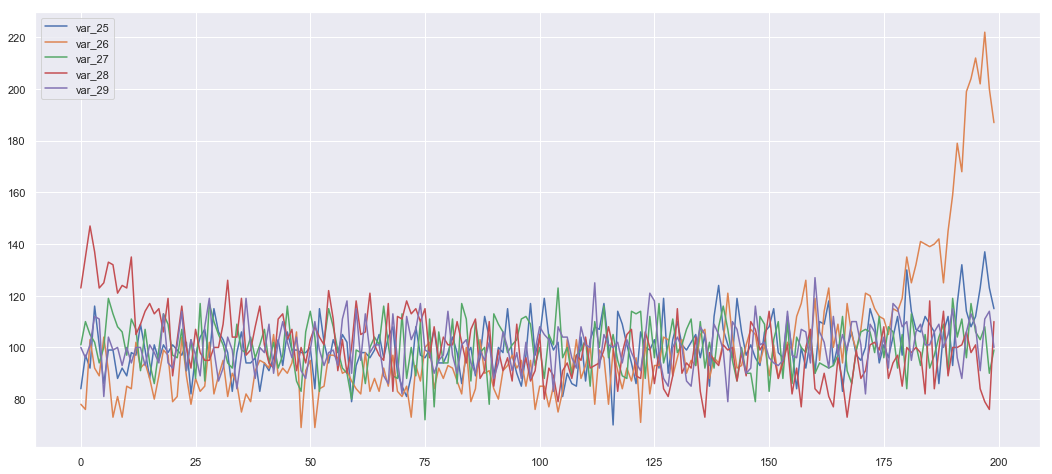

In [23]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

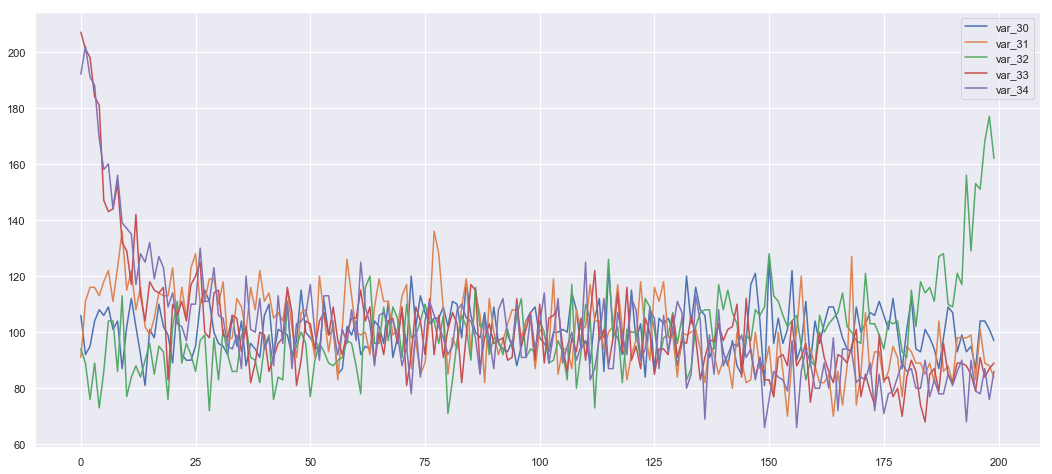

In [24]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

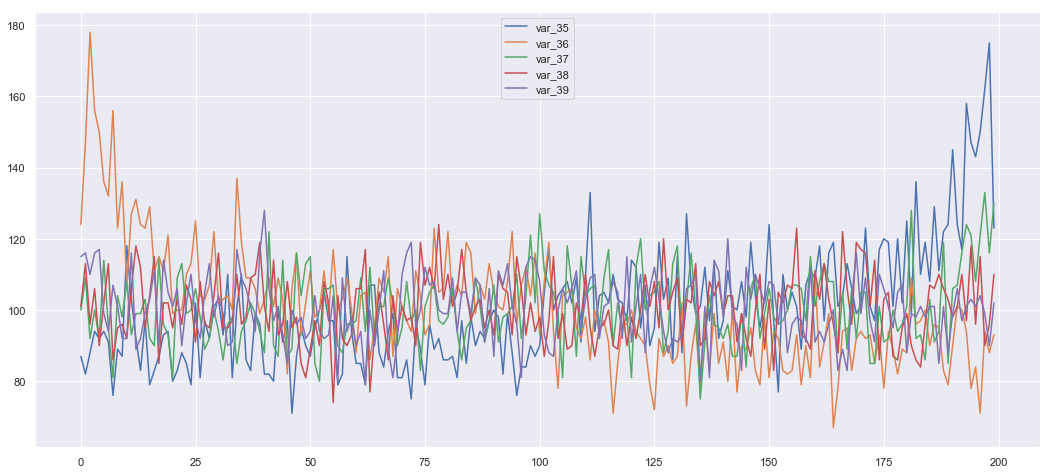

In [25]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

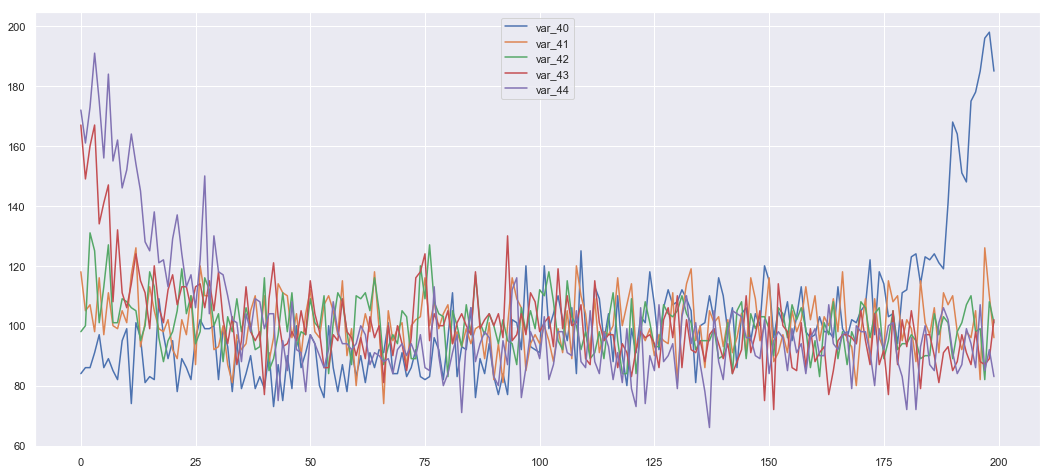

In [26]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

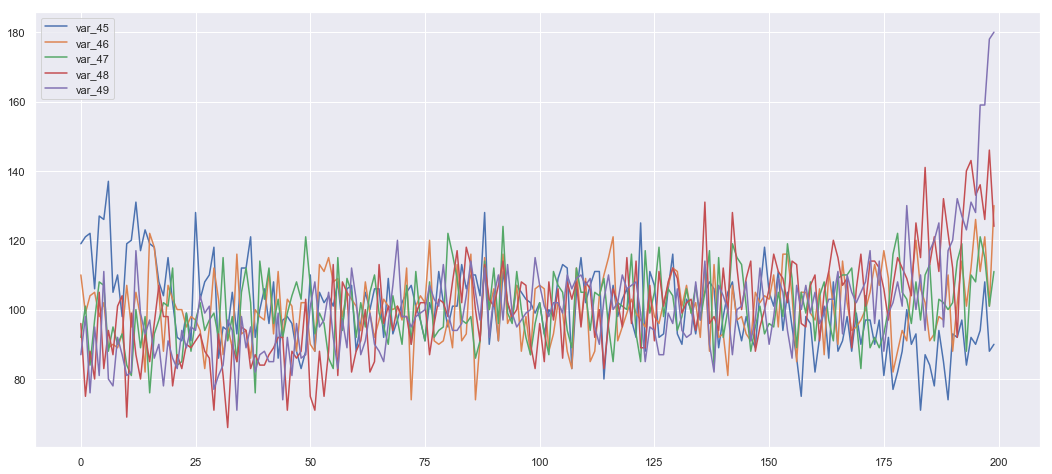

In [27]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

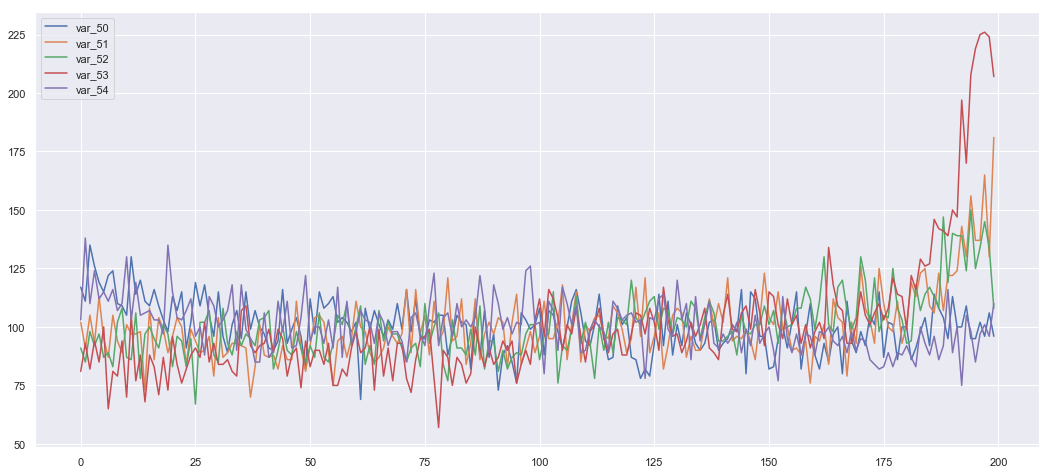

In [28]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

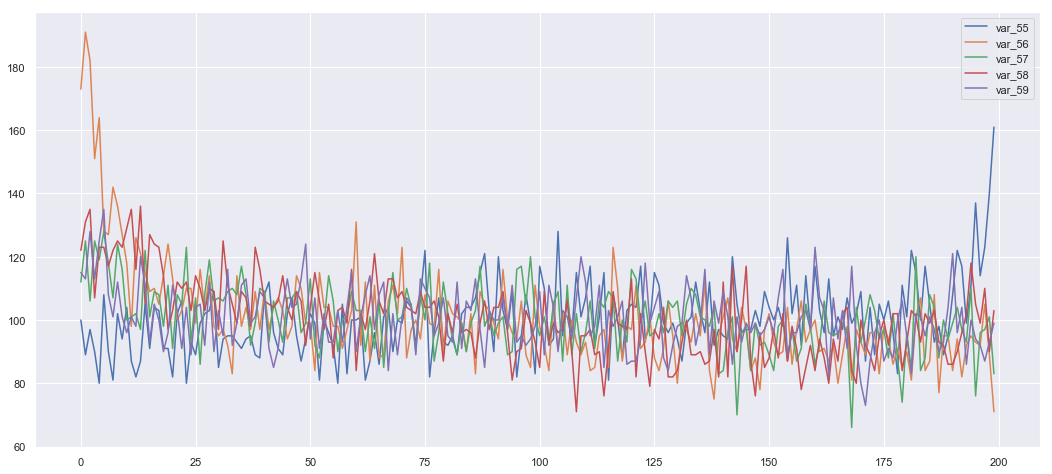

In [29]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

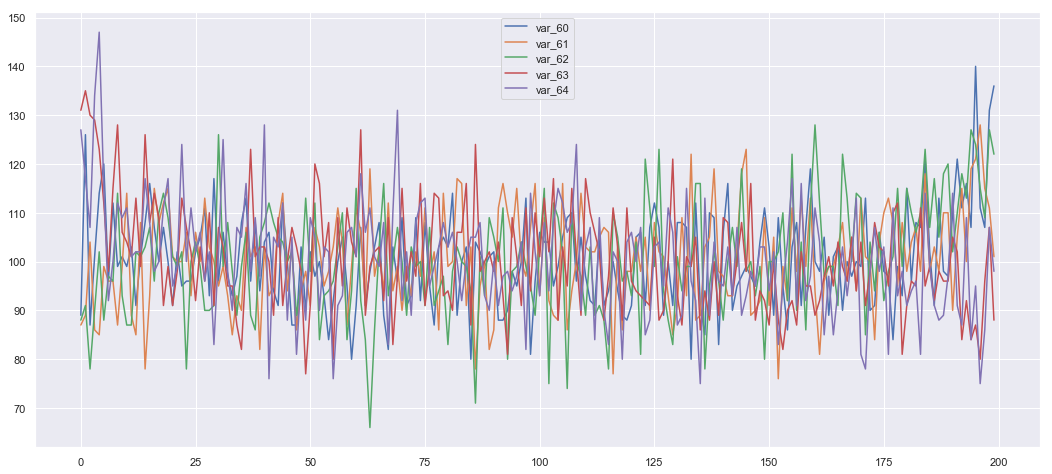

In [30]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

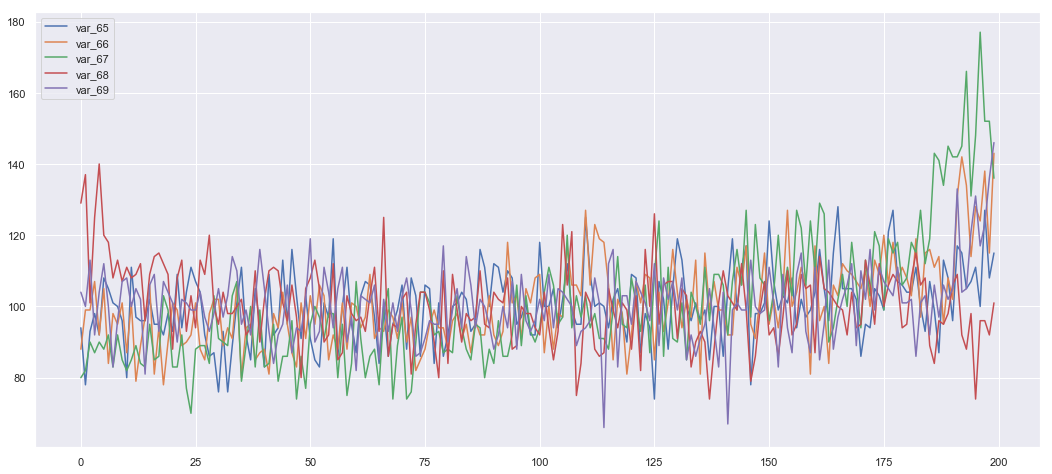

In [31]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

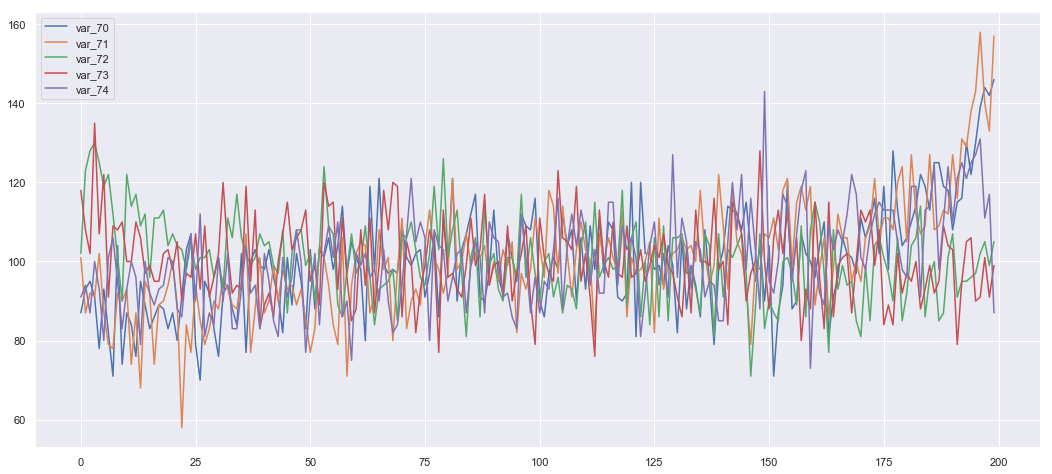

In [32]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

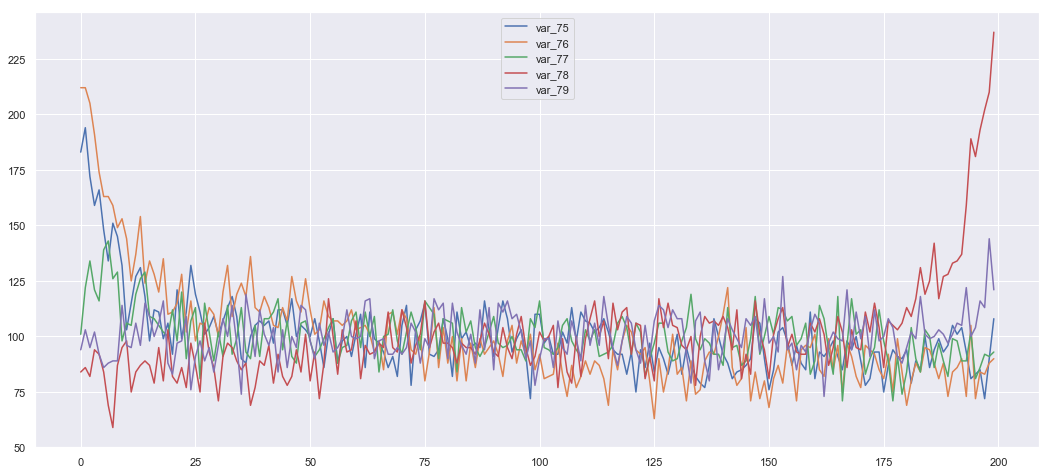

In [33]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

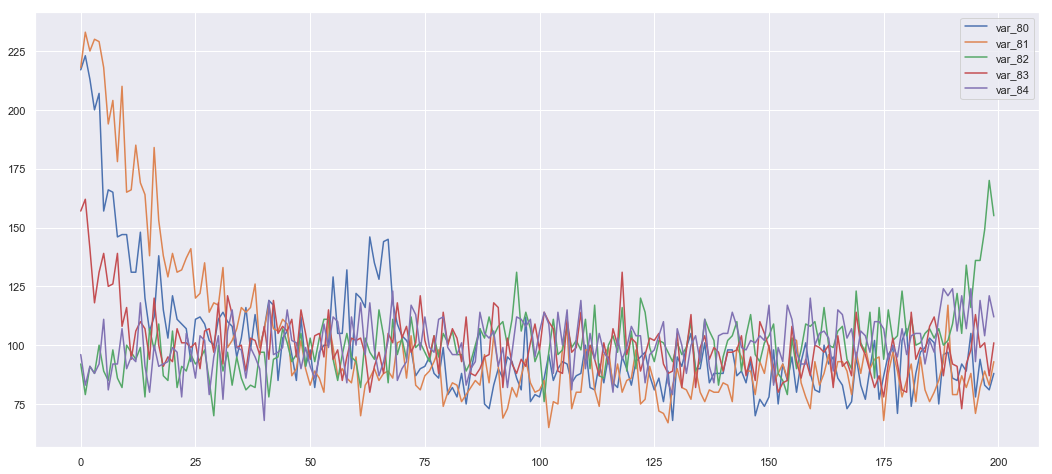

In [34]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

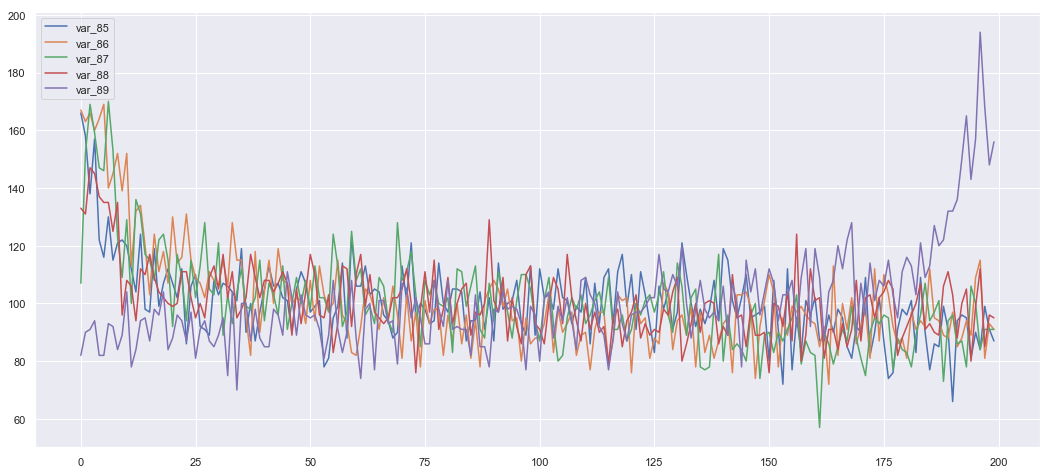

In [35]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

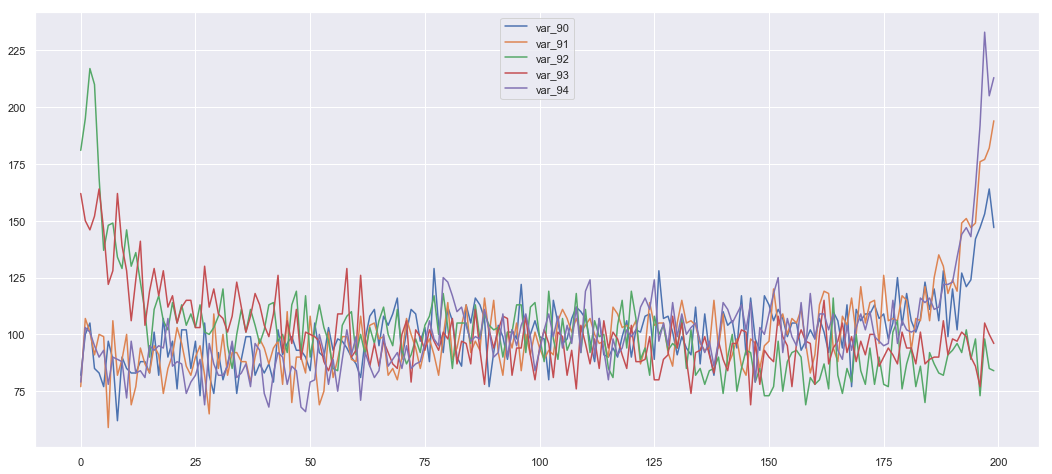

In [36]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

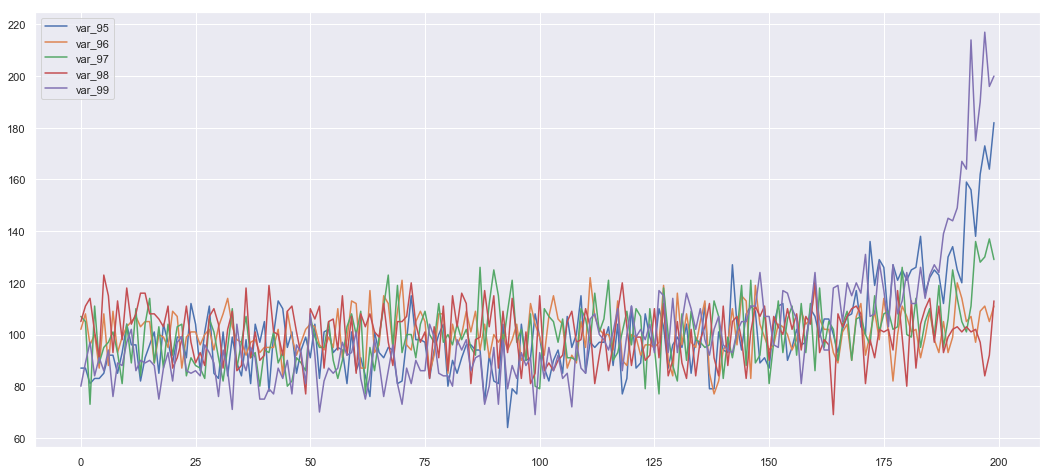

In [37]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

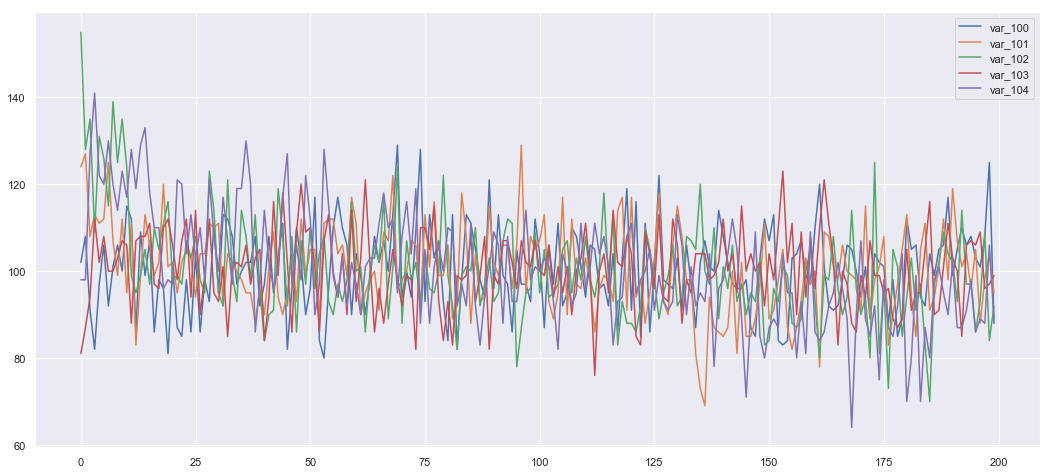

In [38]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

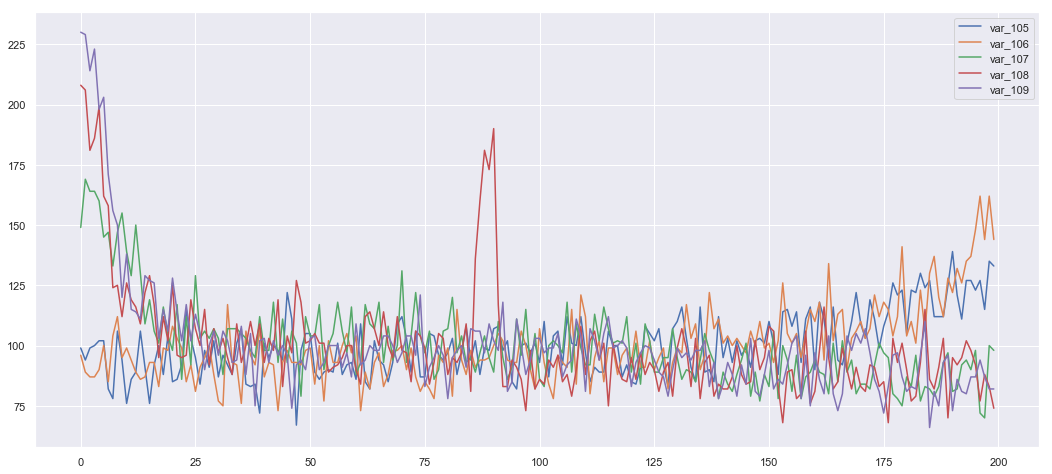

In [39]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

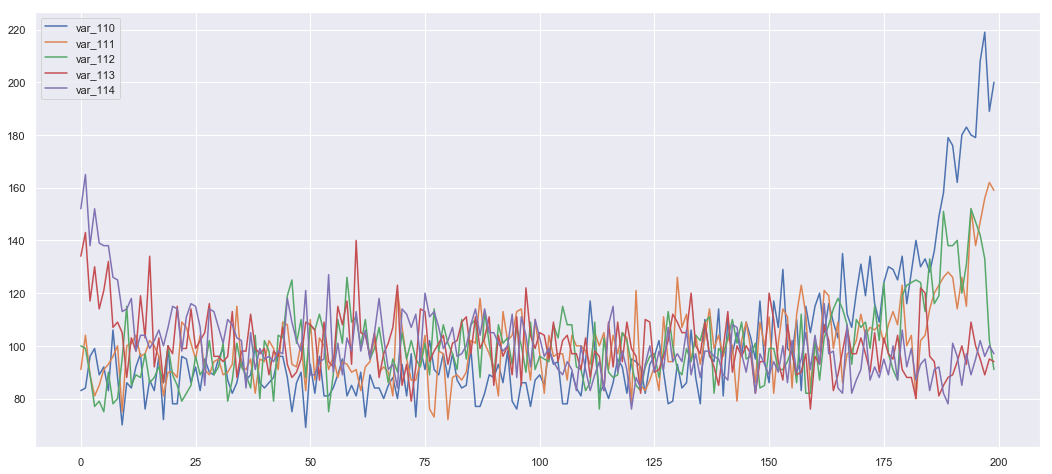

In [40]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

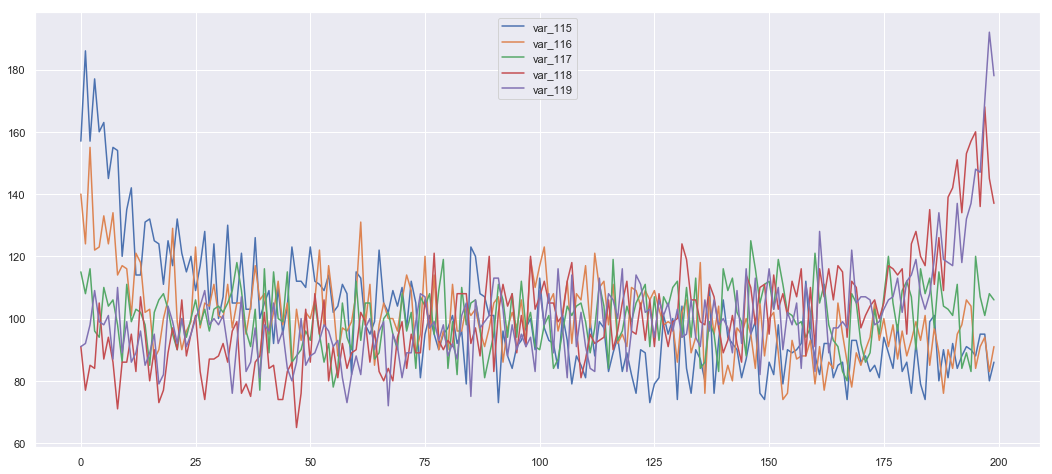

In [41]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

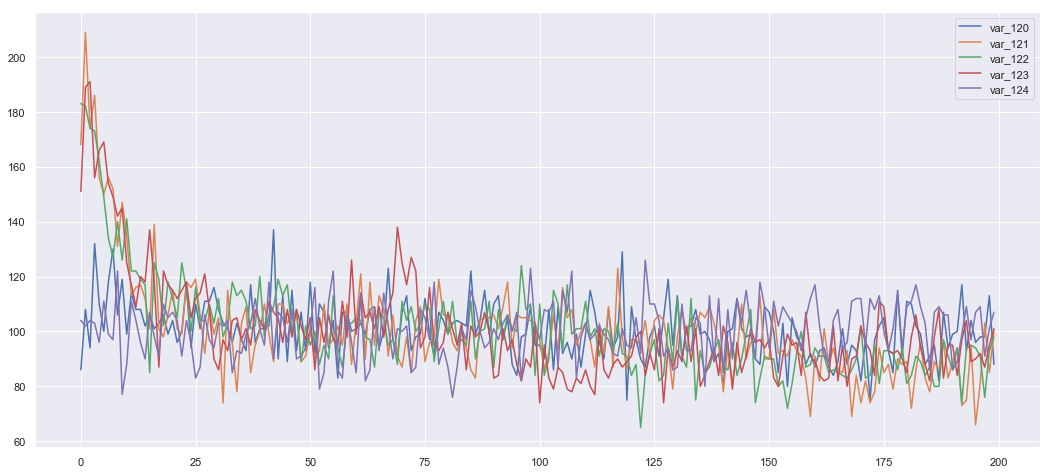

In [42]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

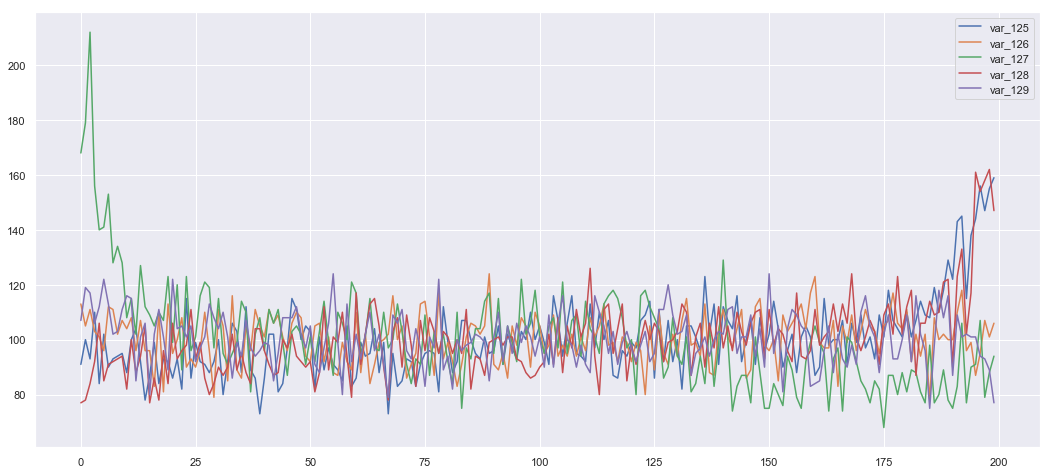

In [43]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

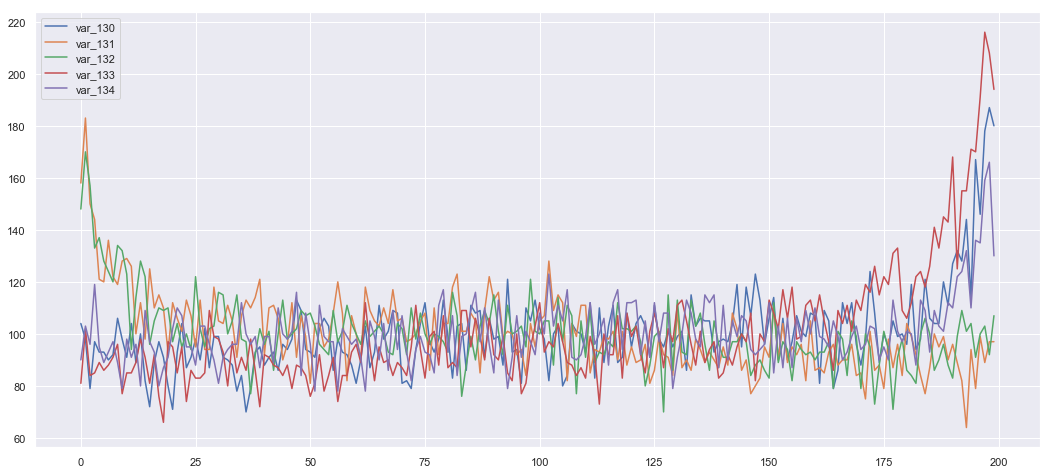

In [44]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

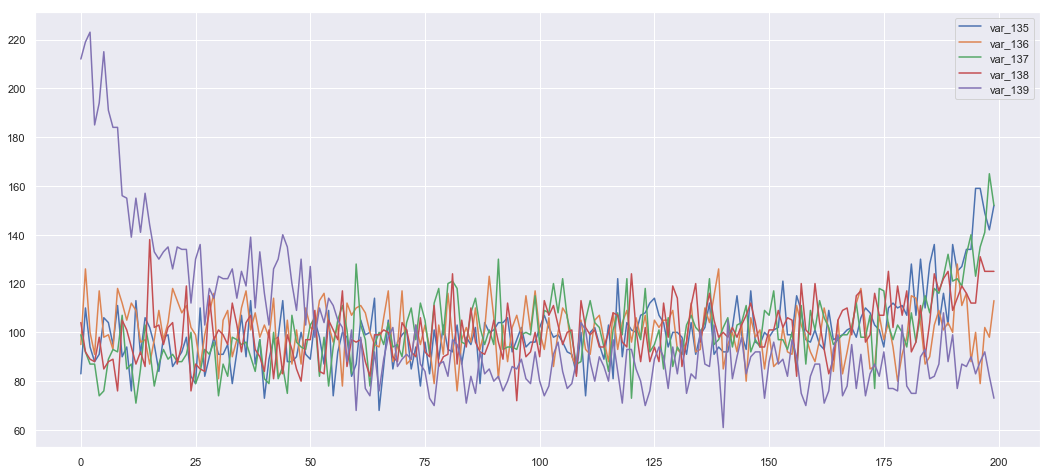

In [45]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

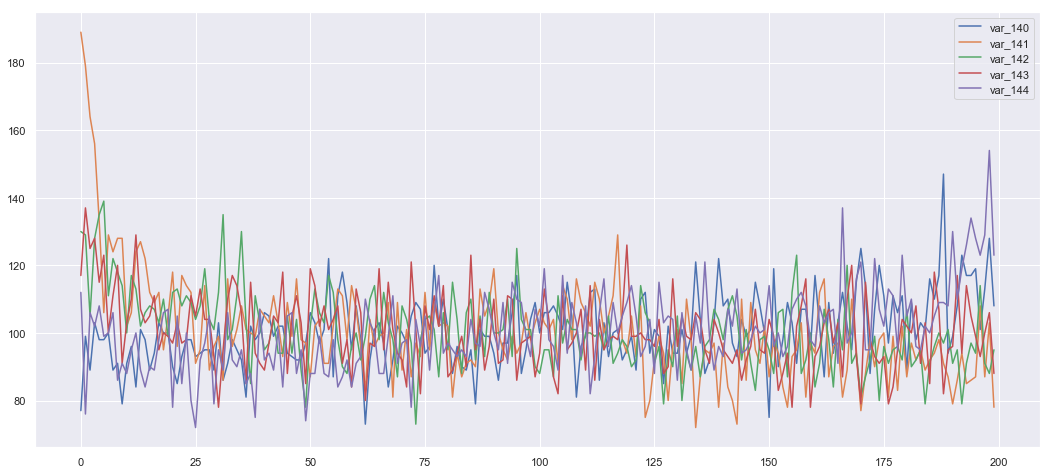

In [46]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

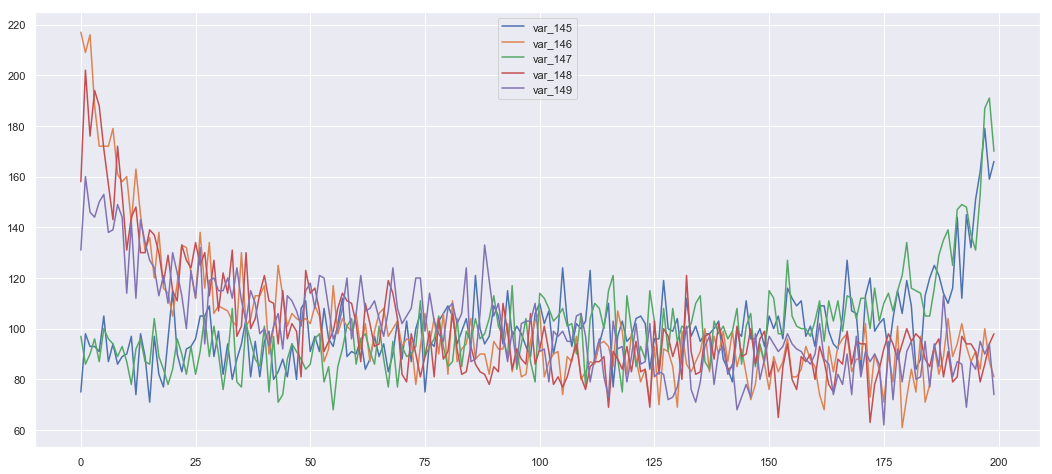

In [47]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

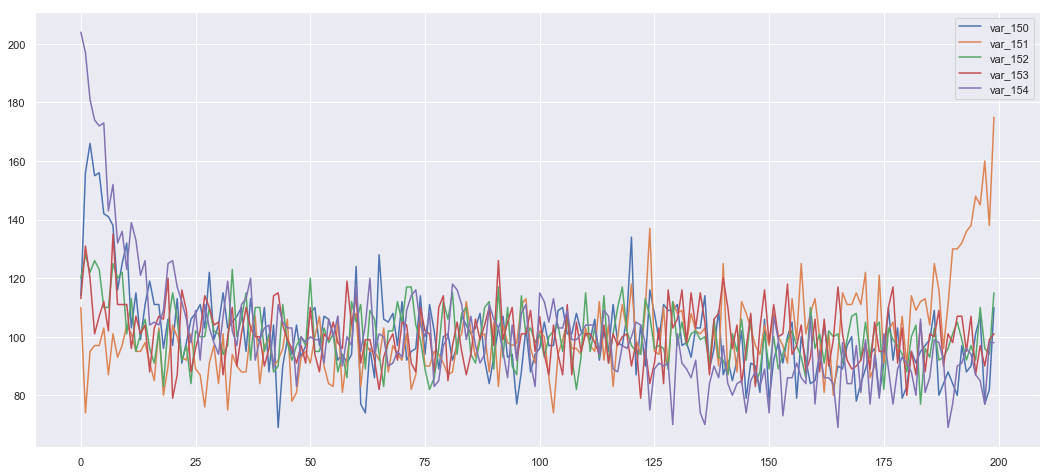

In [48]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

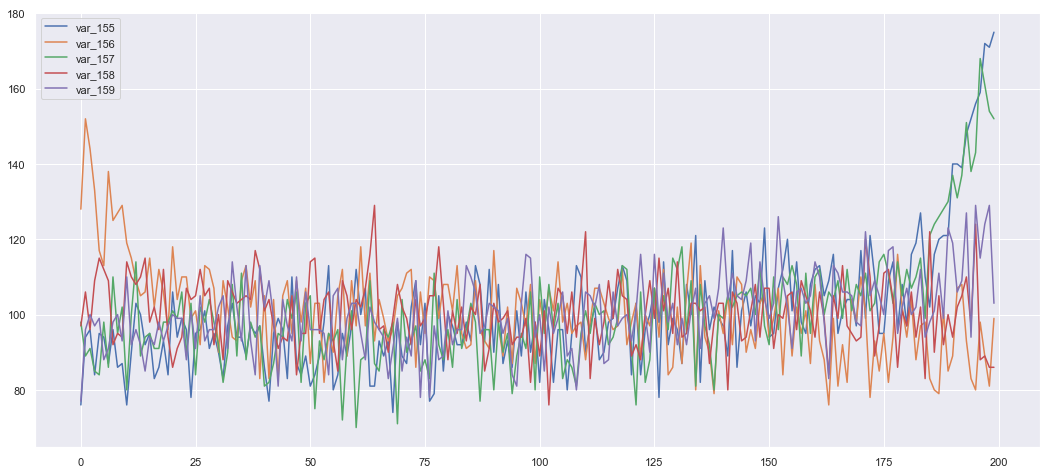

In [49]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

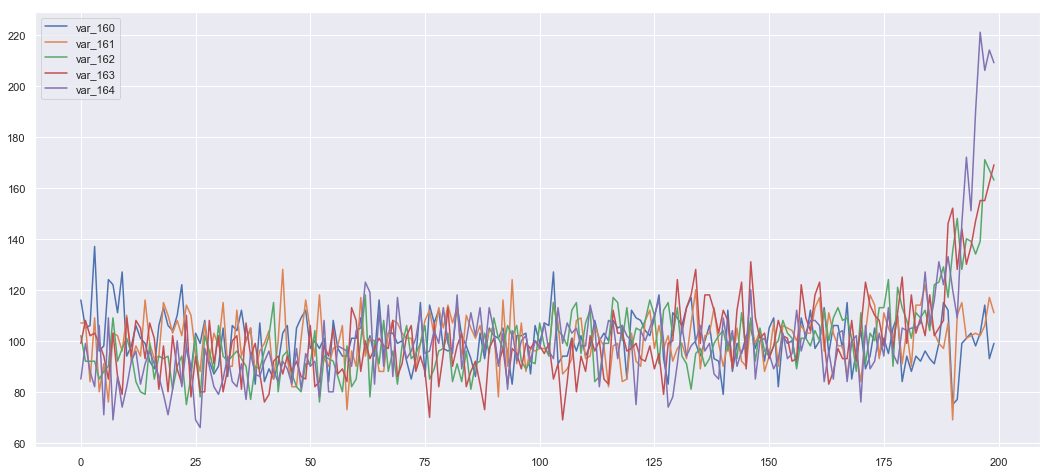

In [50]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

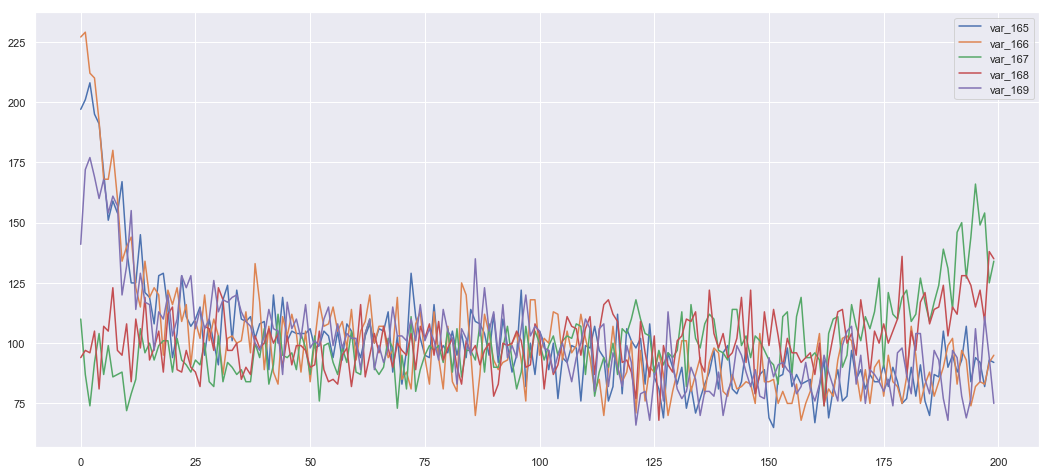

In [51]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

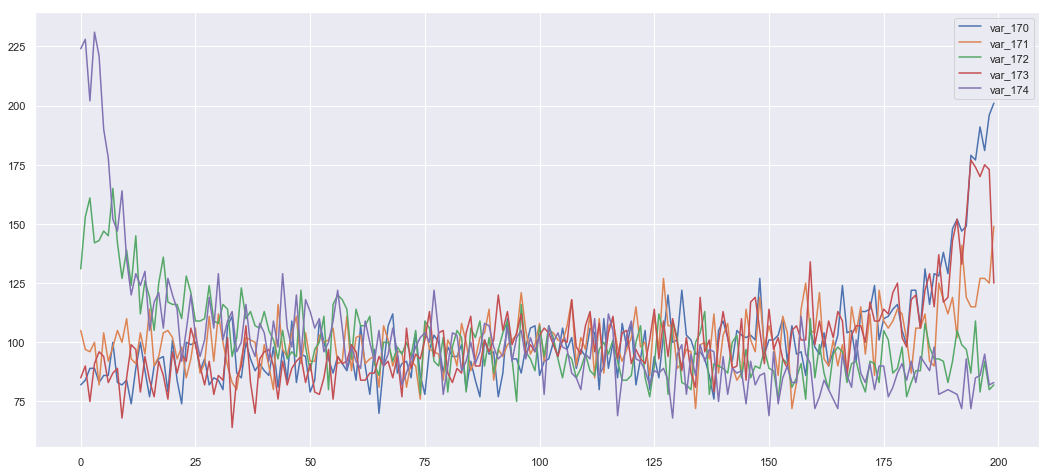

In [52]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

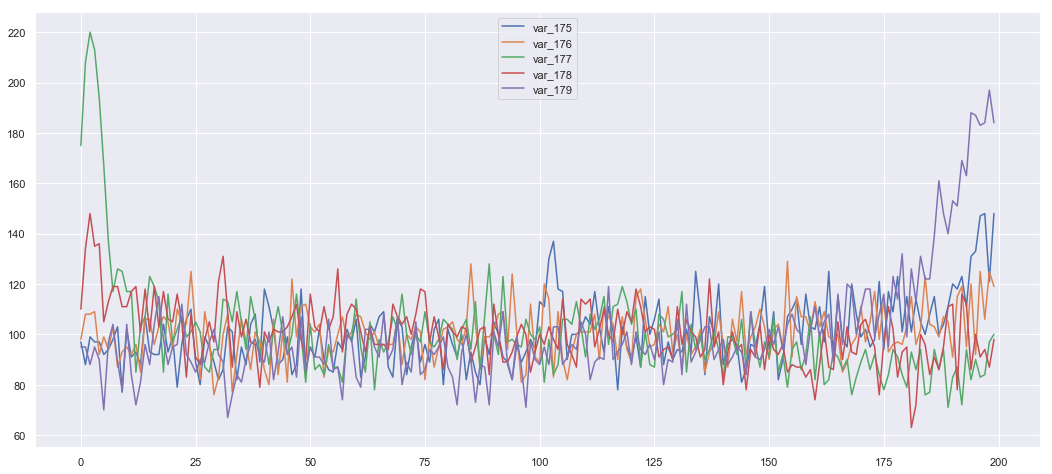

In [53]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

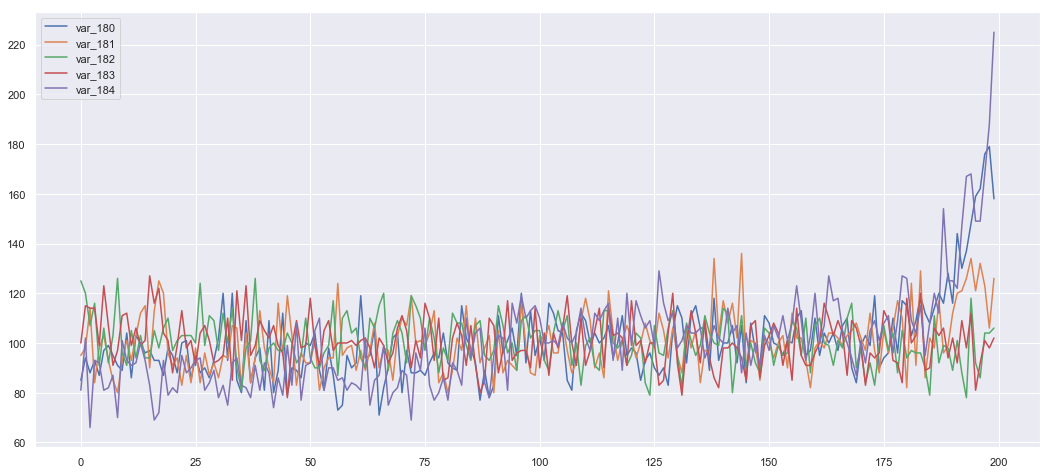

In [54]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

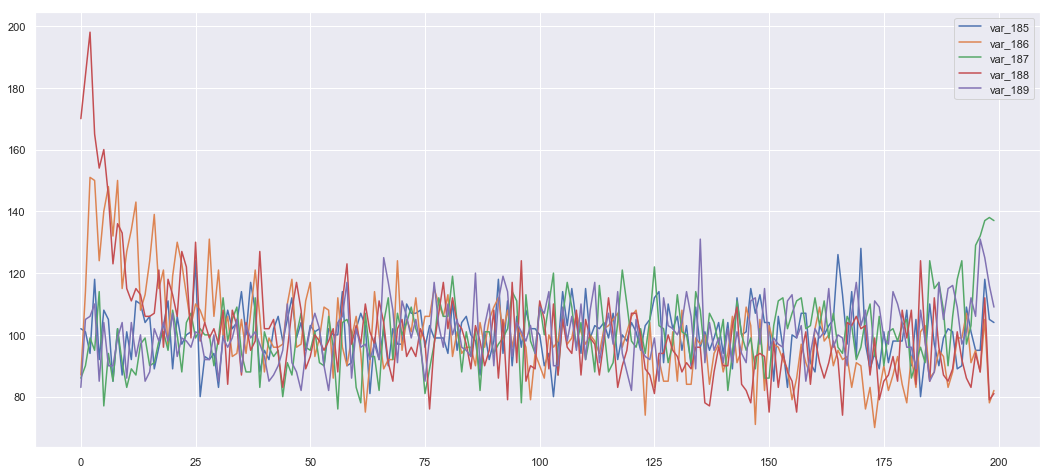

In [55]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

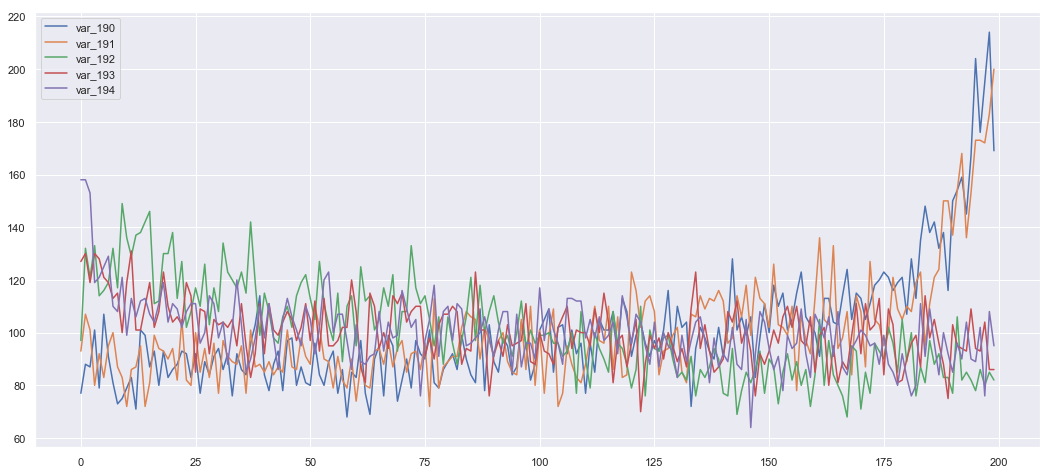

In [56]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

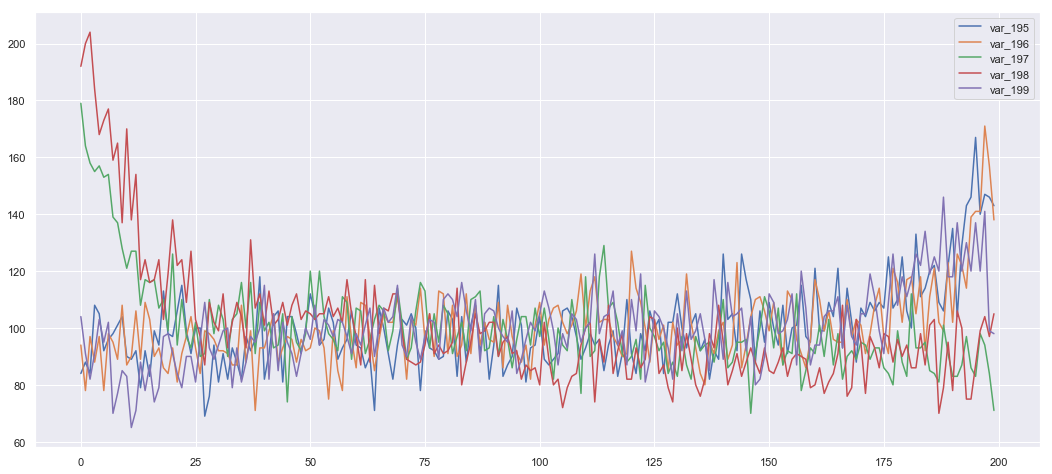

In [57]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

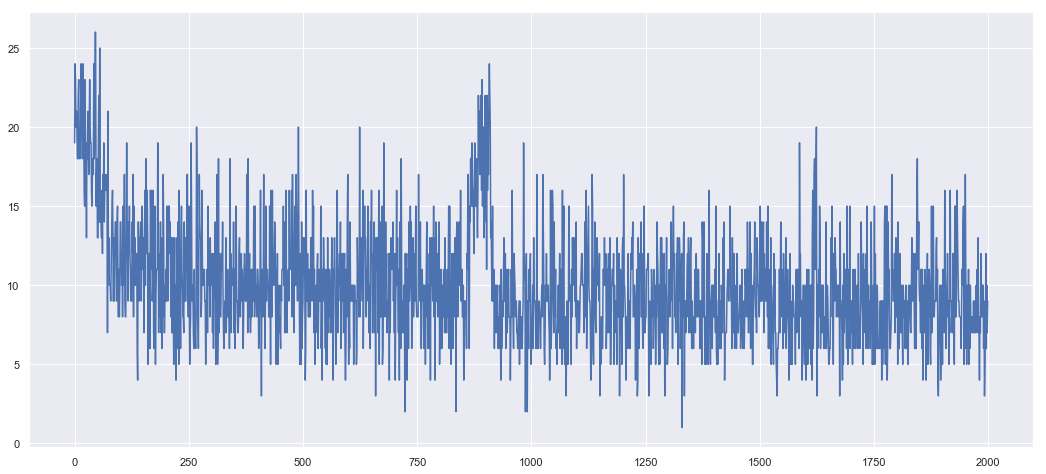

In [69]:
plt.figure(figsize=(18, 8))
plt.plot(time_series.loc['var_108'], label=col)

## var68

In [341]:
def var_68_month(x):
    if 2017 < x and x <= 2018:
        return x - 2017
    elif 2018 < x and x <= 2019:
        return x - 2018
    else:
        return x - 2019

In [346]:
(((train.var_68 * 10000 - 7000) / 365 + 1900).apply(var_68_month) * 12)

0          1.282192
1          4.931507
2          5.194521
3          4.931507
4          7.594521
5          1.315068
6          3.550685
7          1.906849
8          2.860274
9          6.147945
10         4.471233
11         6.016438
12         1.939726
13         6.410959
14         4.372603
15         0.493151
16         5.654795
17         5.621918
18         0.328767
19         6.739726
20         6.279452
21         6.904110
22         7.331507
23         9.567123
24         4.569863
25         6.739726
26         3.583562
27         8.547945
28         5.687671
29         4.339726
30         7.627397
31         0.263014
32         0.789041
33         6.082192
34         5.621918
35         2.301370
36         5.589041
37         4.536986
38         5.687671
39         4.504110
40         0.361644
41         3.254795
42         2.169863
43         4.898630
44         4.175342
45         6.706849
46         5.194521
47         6.246575
48         5.424658
49         2.465753


## var108

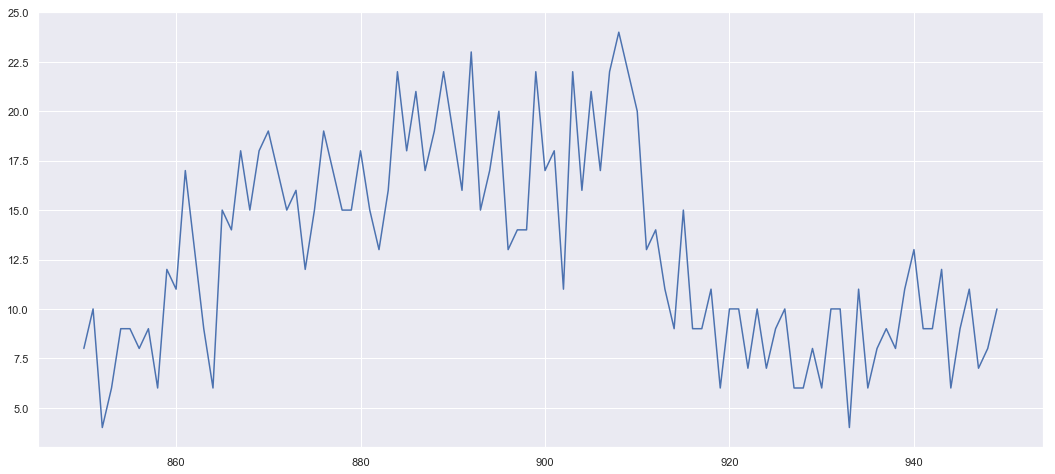

In [384]:
plt.figure(figsize=(18, 8))
plt.plot(time_series.loc['var_108'][850:950])

In [390]:
filter_id = train.sort_values('var_108').iloc[85000:92000].ID_code.values

In [391]:
train['new'] = 0

In [392]:
train.loc[train.ID_code.isin(filter_id), 'new'] = 1

## unique versus std

In [351]:
uniq_std = {"uniq":[], 'std': []}
for col in col_list:
    uniq_std['uniq'].append(train[col].unique().__len__())
    uniq_std['std'].append(train[col].std())

In [356]:
uniq_std = pd.DataFrame(uniq_std)

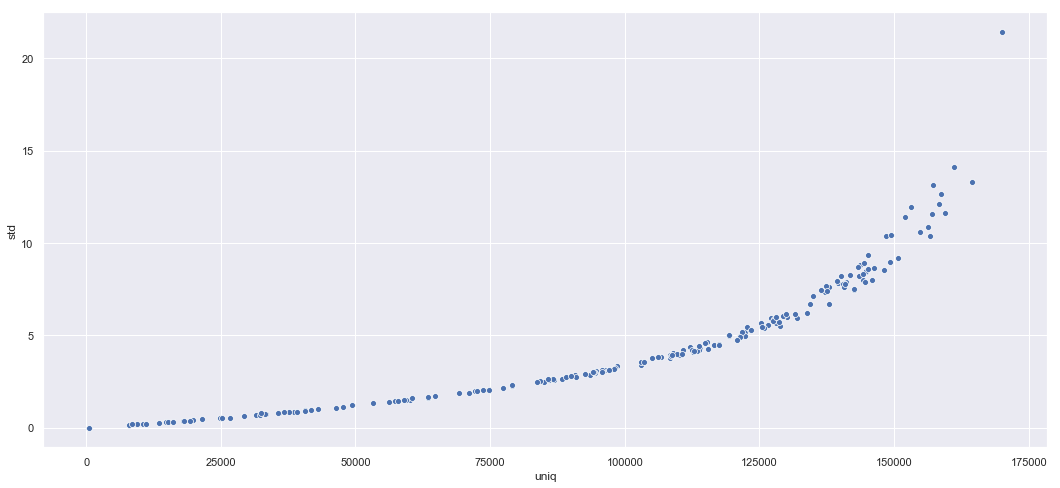

In [359]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x='uniq', y='std', data=uniq_std)

## Shake Modeling

* Base: CV score: 0.89959 
* Shake : CV score: 0.89959 

In [208]:
train_0 = train[train.target == 0].copy()
train_1 = train[train.target == 1].copy()

In [210]:
np.random.seed(42)

In [211]:
for col in tqdm_notebook([col for col in train.columns if col not in ['ID_code', 'target']]):
    temp = train_0[col].values
    np.random.shuffle(temp)
    train_0[col] = temp

In [232]:
train = train_0.append(train_1).sort_index()

In [233]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average': False,
    'boost': 'gbdt',
    'feature_fraction_seed': 47,
    'feature_fraction': 0.041,
    'learning_rate': 0.01,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1
}

In [234]:
features = [c for c in train.columns if c not in ['ID_code', 'target']]
target = train['target']

In [235]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))
feature_importance = pd.DataFrame()

train_columns = [c for c in train.columns if c not in ['ID_code', 'target']]

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, target.values)):    
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][train_columns], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][train_columns], label=target.iloc[val_idx])

    num_round = 60000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=3000, early_stopping_rounds = 200)
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance = pd.DataFrame()
    fold_importance["Feature"] = train_columns
    fold_importance["importance"] = clf.feature_importance()
    fold_importance["fold"] = fold_ + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
    
    print("CV score: {:<8.5f}".format(roc_auc_score(target.values[val_idx], oof_lgb[val_idx])))
    
print("CV score: {:<8.5f}".format(roc_auc_score(target.values, oof_lgb)))

fold n°0
Training until validation scores don't improve for 200 rounds.
[3000]	training's auc: 0.921283	valid_1's auc: 0.89619
[6000]	training's auc: 0.935776	valid_1's auc: 0.899982
Early stopping, best iteration is:
[6692]	training's auc: 0.938526	valid_1's auc: 0.900164
CV score: 0.90016 
fold n°1
Training until validation scores don't improve for 200 rounds.
[3000]	training's auc: 0.921568	valid_1's auc: 0.896994
Early stopping, best iteration is:
[5020]	training's auc: 0.931758	valid_1's auc: 0.899399
CV score: 0.89940 
fold n°2
Training until validation scores don't improve for 200 rounds.
[3000]	training's auc: 0.920053	valid_1's auc: 0.902223
[6000]	training's auc: 0.934612	valid_1's auc: 0.90526
Early stopping, best iteration is:
[7100]	training's auc: 0.938982	valid_1's auc: 0.905676
CV score: 0.90568 
fold n°3
Training until validation scores don't improve for 200 rounds.
[3000]	training's auc: 0.921853	valid_1's auc: 0.894443
[6000]	training's auc: 0.936069	valid_1's auc: 0

## Simple Modeling

In [403]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average': False,
    'boost': 'gbdt',
    'feature_fraction_seed': 47,
    'feature_fraction': 0.041,
    'learning_rate': 0.01,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1,
    'num_threads': 16
}

In [404]:
features = [c for c in train.columns if c not in ['ID_code', 'target']]
target = train['target']

In [405]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))
feature_importance = pd.DataFrame()

train_columns = [c for c in train.columns if c not in ['ID_code', 'target']]

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, target.values)):    
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][train_columns], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][train_columns], label=target.iloc[val_idx])

    num_round = 60000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=3000, early_stopping_rounds = 200)
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance = pd.DataFrame()
    fold_importance["Feature"] = train_columns
    fold_importance["importance"] = clf.feature_importance()
    fold_importance["fold"] = fold_ + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
    
    print("CV score: {:<8.5f}".format(roc_auc_score(target.values[val_idx], oof_lgb[val_idx])))
    
print("CV score: {:<8.5f}".format(roc_auc_score(target.values, oof_lgb)))

fold n°0
Training until validation scores don't improve for 200 rounds.
[3000]	training's auc: 0.921561	valid_1's auc: 0.896028
[6000]	training's auc: 0.93604	valid_1's auc: 0.899441
Early stopping, best iteration is:
[6067]	training's auc: 0.936302	valid_1's auc: 0.899503
CV score: 0.89950 
fold n°1
Training until validation scores don't improve for 200 rounds.
[3000]	training's auc: 0.921516	valid_1's auc: 0.897313
[6000]	training's auc: 0.935852	valid_1's auc: 0.899958
Early stopping, best iteration is:
[6330]	training's auc: 0.937156	valid_1's auc: 0.900005
CV score: 0.90000 
fold n°2
Training until validation scores don't improve for 200 rounds.
[3000]	training's auc: 0.92043	valid_1's auc: 0.902095
[6000]	training's auc: 0.934863	valid_1's auc: 0.905863
Early stopping, best iteration is:
[6644]	training's auc: 0.937438	valid_1's auc: 0.906232
CV score: 0.90623 
fold n°3
Training until validation scores don't improve for 200 rounds.
[3000]	training's auc: 0.921865	valid_1's auc: 0

In [408]:
train['pred'] = oof_lgb

In [409]:
result = {}
for col in tqdm_notebook(col_list):
    windows = 1000
    iterations = 200000 / windows
    target = train.sort_values(col).pred.values
    result[col] = []
    for i in range(int(iterations)):
        result[col].append(target[i * windows: (i + 1) * windows].mean())

In [410]:
time_series = pd.DataFrame(result).T

In [467]:
idx=108

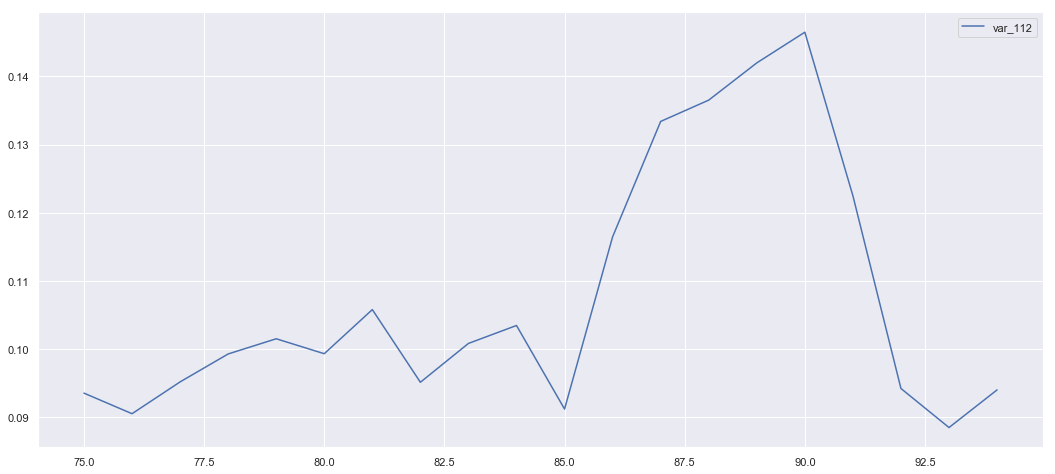

In [472]:
col = col_list[idx]
plt.figure(figsize=(18, 8))
plt.plot(time_series.loc['var_108'][75:95], label=col)
plt.legend()
idx += 1

## 삐꾸 인덱스

In [62]:
temp = train.target.to_frame()
temp['predict'] = oof_lgb
temp = temp.loc[(temp.predict <= 0.1)].reset_index()

In [63]:
temp['new_target']  = 0

In [64]:
temp.loc[temp.target == 1, 'new_target'] = 1

In [65]:
train = temp[['index', 'new_target']].merge(train.reset_index(), on='index', how='left').drop(['index', 'ID_code', 'target'], axis=1)

In [15]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average': False,
    'boost': 'gbdt',
    'feature_fraction_seed': 47,
    'feature_fraction': 0.041,
    'learning_rate': 0.01,
    'max_depth': -1,
    'metric':'binary_logloss',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1,
    'num_threads': 16
}

In [16]:
features = [c for c in train.columns if c not in [""]]
target = train['new_target']

In [17]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_lgb = np.zeros(len(train))
# predictions_lgb = np.zeros(len(test))
feature_importance = pd.DataFrame()

train_columns = [c for c in train.columns if c not in ['ID_code', 'target']]

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, target.values)):    
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][train_columns], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][train_columns], label=target.iloc[val_idx])

    num_round = 60000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=3000, early_stopping_rounds = 200)
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
    
#     predictions_lgb += clf.predict(test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance = pd.DataFrame()
    fold_importance["Feature"] = train_columns
    fold_importance["importance"] = clf.feature_importance()
    fold_importance["fold"] = fold_ + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
    
    print("CV score: {:<8.5f}".format(roc_auc_score(target.values[val_idx], oof_lgb[val_idx])))
    
print("CV score: {:<8.5f}".format(roc_auc_score(target.values, oof_lgb)))

fold n°0
Training until validation scores don't improve for 200 rounds.
[3000]	training's binary_logloss: 0.0125202	valid_1's binary_logloss: 0.0176091
[6000]	training's binary_logloss: 0.00281793	valid_1's binary_logloss: 0.0052946
[9000]	training's binary_logloss: 0.000996999	valid_1's binary_logloss: 0.00204075
Early stopping, best iteration is:
[10580]	training's binary_logloss: 0.000577614	valid_1's binary_logloss: 0.00119444
CV score: 1.00000 
fold n°1
Training until validation scores don't improve for 200 rounds.
[3000]	training's binary_logloss: 0.0125449	valid_1's binary_logloss: 0.0176089
[6000]	training's binary_logloss: 0.00282113	valid_1's binary_logloss: 0.00530612
[9000]	training's binary_logloss: 0.000998145	valid_1's binary_logloss: 0.00203906
Early stopping, best iteration is:
[10701]	training's binary_logloss: 0.000572436	valid_1's binary_logloss: 0.00118445
CV score: 1.00000 
fold n°2
Training until validation scores don't improve for 200 rounds.
[3000]	training's b

In [38]:
roc_auc_score(cv_test.target, clf.predict(cv_test[train_columns]))

0.9013276627284218

In [41]:
new = pd.DataFrame(clf.predict(cv_test[train_columns]))

In [45]:
te = cv_test.copy()

In [47]:
te['pred'] = clf.predict(cv_test[train_columns])

In [51]:
tt = clf_temp.predict(te[te.pred <= 0.1][train_columns])

In [43]:
new[new[0] <= 0.1]

0
0      0.006938
2      0.002014
3      0.021930
5      0.055707
6      0.044543
9      0.050246
10     0.025858
11     0.019612
13     0.031741
14     0.025056
17     0.068228
19     0.018036
20     0.005796
22     0.013074
23     0.062404
25     0.009791
28     0.011036
30     0.056694
31     0.015856
32     0.016374
33     0.004132
34     0.003756
35     0.006473
36     0.013286
37     0.022800
38     0.006576
40     0.012006
44     0.016331
45     0.079824
46     0.047031
47     0.036543
48     0.027933
50     0.060304
51     0.025571
52     0.069017
53     0.053702
54     0.098548
56     0.012506
57     0.085456
58     0.011545
60     0.069360
62     0.029490
63     0.053709
64     0.070081
67     0.076345
68     0.018708
69     0.012326
70     0.056372
71     0.002287
72     0.043359
73     0.095056
74     0.042062
75     0.070134
76     0.081359
80     0.096977
81     0.039085
82     0.018361
84     0.043397
85     0.027845
86     0.005858
87     0.007679
90     0.050777
91     0.019660
92     0.019132
93     0.009592
95     0.050526
96     0.030167
97     0.006441
98     0.005287
100    0.040694
101    0.012362
102    0.070158
103    0.024643
104    0.005382
106    0.025765
107    0.057039
108    0.018451
109    0.040327
110    0.002387
111    0.041504
112    0.041162
113    0.022456
115    0.097089
116    0.017324
117    0.012552
118    0.010379
120    0.006354
122    0.006550
123    0.027103
124    0.011986
127    0.085348
128    0.039162
129    0.047047
130    0.099507
131    0.012930
132    0.040950
134    0.008332
135    0.022049
136    0.014610
137    0.005037
...         ...
19866  0.008108
19867  0.033886
19868  0.021224
19869  0.058372
19870  0.003340
19872  0.029921
19874  0.008351
19875  0.068292
19877  0.035325
19878  0.007960
19880  0.088181
19881  0.034444
19882  0.016815
19884  0.013462
19886  0.066414
19887  0.019320
19888  0.006740
19889  0.010651
19890  0.010906
19891  0.019030
19892  0.036723
19893  0.020734
19894  0.022053
19895  0.011682
19897  0.096313
19898  0.063807
19900  0.016557
19901  0.063808
19903  0.050767
19904  0.030146
19905  0.006904
19907  0.040478
19908  0.022899
19910  0.007628
19911  0.049421
19912  0.021783
19913  0.093807
19914  0.010352
19915  0.025293
19916  0.048726
19917  0.025436
19918  0.010645
19920  0.068759
19921  0.048430
19922  0.018250
19923  0.086638
19924  0.008981
19925  0.013770
19926  0.089520
19927  0.011013
19928  0.052167
19930  0.002931
19934  0.064340
19935  0.004195
19937  0.046577
19942  0.008043
19943  0.012851
19944  0.054463
19945  0.001554
19947  0.013543
19948  0.052094
19949  0.013408
19950  0.057596
19951  0.078896
19952  0.057738
19953  0.008916
19954  0.007824
19955  0.051018
19957  0.010038
19958  0.021905
19960  0.058884
19961  0.009816
19962  0.010933
19963  0.023863
19964  0.037082
19966  0.006993
19968  0.007678
19969  0.068339
19972  0.011033
19974  0.072881
19975  0.010428
19977  0.061533
19978  0.007633
19980  0.071466
19981  0.021678
19982  0.075411
19983  0.021231
19984  0.004462
19985  0.030970
19986  0.047999
19987  0.021771
19988  0.040052
19989  0.045969
19991  0.009964
19992  0.002585
19994  0.040536
19995  0.036487
19997  0.038463
19998  0.026047
19999  0.013872

[14826 rows x 1 columns]

In [ ]:
clf_temp.predict()

In [ ]:
clf_temp

In [204]:
temp = target.to_frame()

In [205]:
temp['oof'] = oof_lgb

In [206]:
temp.sort_values('oof')

new_target       oof
131526           0  0.000026
33874            0  0.000026
54983            0  0.000027
95004            0  0.000027
61147            0  0.000029
126196           0  0.000029
98953            0  0.000030
53676            0  0.000030
60050            0  0.000031
138262           0  0.000031
22104            0  0.000031
106412           0  0.000031
127030           0  0.000031
28323            0  0.000031
42680            0  0.000032
121582           0  0.000032
54621            0  0.000032
101033           0  0.000032
32059            0  0.000033
29064            0  0.000033
80331            0  0.000033
53247            0  0.000034
96492            0  0.000034
102224           0  0.000034
103531           0  0.000034
21583            0  0.000034
15510            0  0.000035
140795           0  0.000035
141389           0  0.000035
1436             0  0.000035
4273             0  0.000035
112797           0  0.000035
5298             0  0.000035
126386           0  0.000035
96656            0  0.000035
30385            0  0.000035
97294            0  0.000035
82441            0  0.000036
65122            0  0.000036
29883            0  0.000036
137294           0  0.000036
78314            0  0.000037
43008            0  0.000037
124783           0  0.000037
35043            0  0.000037
7081             0  0.000037
20855            0  0.000037
27730            0  0.000037
136254           0  0.000037
85970            0  0.000037
49819            0  0.000038
85316            0  0.000038
98010            0  0.000038
63110            0  0.000038
95633            0  0.000038
38359            0  0.000038
134112           0  0.000039
22480            0  0.000039
122030           0  0.000039
145658           0  0.000039
61426            0  0.000039
105329           0  0.000039
118649           0  0.000039
102119           0  0.000039
74620            0  0.000039
47329            0  0.000039
111834           0  0.000039
33989            0  0.000039
19875            0  0.000039
77654            0  0.000039
26263            0  0.000040
68969            0  0.000040
31020            0  0.000040
107171           0  0.000040
116081           0  0.000040
40172            0  0.000040
1217             0  0.000040
144538           0  0.000040
65096            0  0.000040
38267            0  0.000040
5904             0  0.000040
124704           0  0.000040
17713            0  0.000040
147060           0  0.000040
75546            0  0.000040
83218            0  0.000041
91714            0  0.000041
3912             0  0.000041
120229           0  0.000041
143060           0  0.000041
52580            0  0.000041
103851           0  0.000041
10784            0  0.000041
146298           0  0.000041
59700            0  0.000042
110848           0  0.000042
120365           0  0.000042
69297            0  0.000042
68287            0  0.000042
144657           0  0.000042
...            ...       ...
116855           1  0.986147
104786           1  0.986149
78734            1  0.986211
65302            1  0.986214
42700            1  0.986230
6181             1  0.986236
30325            1  0.986249
119880           1  0.986251
69150            1  0.986263
62549            1  0.986315
71637            1  0.986321
141626           1  0.986321
87550            1  0.986345
129424           1  0.986393
25514            1  0.986404
133448           1  0.986420
89732            1  0.986426
111811           1  0.986454
113876           1  0.986498
21501            1  0.986532
113763           1  0.986548
3472             1  0.986573
4641             1  0.986584
41022            1  0.986623
83370            1  0.986634
87485            1  0.986696
64453            1  0.986708
135873           1  0.986726
59043            1  0.986745
136950           1  0.986769
92581            1  0.986811
120282           1  0.986850
137519           1  0.986860
2013             1  0.986861
105499           1  0.986873
72682            1  0.986992
39946 